x(t) = a0/2 + SUM(1 to N)(an*cos(nwt)+bn*sin(nwt))

In [168]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math

#def f(t):
#    return A * np.cos(t*2*np.pi/T)   #x(t)

def f(t):
    return np.sign(math.tan(np.pi*t/T))*A


def f0(t):
    return f(t)

def f1(t, n):
    return f(t)*np.cos(n*2*np.pi/T *t)

def f2(t, n):
    return f(t)*np.sin(n*2*np.pi/T*t)

def an(n):
    v, err = quad(f1, t0, t0+T, args=(n))
    a = (2/T) * v
    return a

def bn(n):
    v, err = quad(f2, t0, t0+T, args=(n))
    b = (2/T) * v
    return b

In [169]:
T = 2 #период
A = 2 #амплдитуда 
t0 = 0

In [170]:
v, err = quad(f0, t0, t0+T)
#v1, err = quad(f1, t0, t0+T)
#v2, err = quad(f2, t0, t0+T)
print(v, err)
a0 = (2/T) * v
#an = 2/T * v1
#bn = 2/T * v2

0.0 4.440892098500626e-14


2.6717585141713186e-16
-2.498001805406602e-16


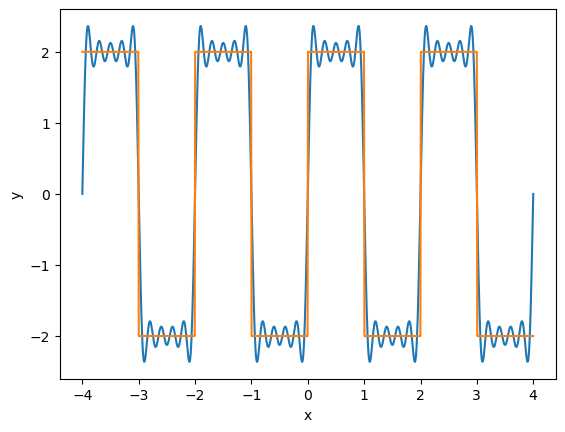

In [181]:
N=10   # число гармоник
time = np.linspace(-4,4,1000)
sum =[]
su =[]
for t in (time):
    su = [(an(n)*np.cos(n*(2*np.pi/T)*t)+bn(n)*np.sin(n*(2*np.pi/T)*t))  for n in range(N)]
    sum.append(np.sum(su))
    

for i in sum:
    i = i+a0/2
    
y1 = sum   #*x(t)
x1 = time

y = [f(t) for t in x1] 

plt.plot(x1, y1)
plt.plot(x1, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [183]:
print(an(1))
print(an(2))
print(an(3))

2.6717585141713186e-16
-2.498001805406602e-16
5.73423000268419e-16


In [142]:
yf = np.zeros_like(time)    #counting errors
yf = np.array(y)-np.array(y1)
print(len(yf))

1000


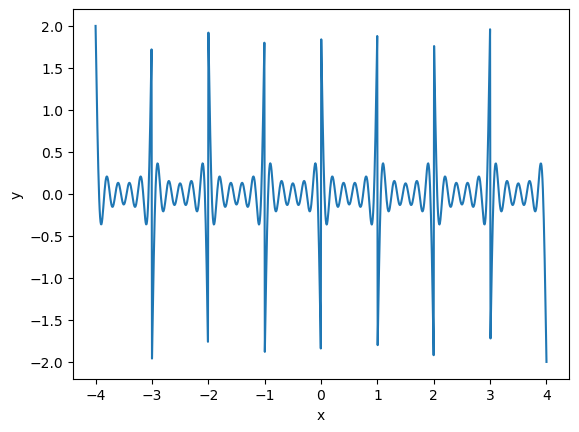

In [143]:
plt.plot(x1, yf)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [144]:
f = 100
fmax = 800
T = 1.0/fmax   #  f = 100
N = 600

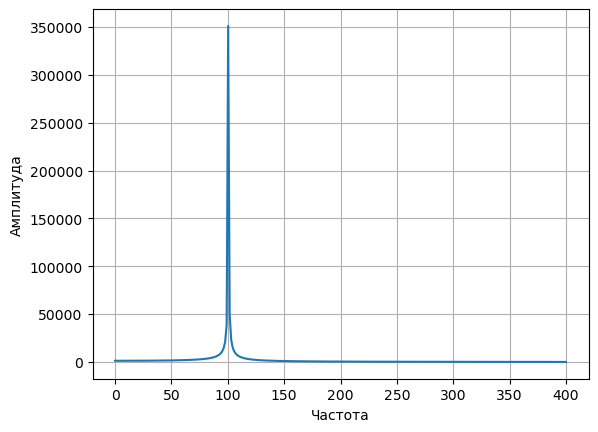

In [145]:
from scipy.fftpack import fft #преобразрвание Фурье / спектр cos

xfun=np.linspace(0.0,N*T,N)
fun = np.cos(f*xfun*2.0*np.pi) 


xf = np.linspace(0.0,fmax/2,N//2)
#xf = np.fft.fftshift(np.fft.fftfreq(xf.shape[-1], xf[1]-xf[0]))
yf = (fft(fun))

# x = np.linspace(0.0, N*T, N, endpoint=False)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
# yf = fft(y)
plt.plot(xf, 2.0*N*np.abs(yf[0:N//2]))
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

In [146]:
T=2
A

2

In [147]:
def f(t):
    return np.sign(math.tan(np.pi*t/T))*A
#def f(t):
 #    return A * np.cos(t*2*np.pi/T)

In [161]:
x2 =  np.linspace(-4,4,100)
y2 = [f(t) for t in x2]
x2 = np.fft.fftshift(np.fft.fftfreq(x2.shape[-1], x2[1]-x2[0]))
yg = abs(np.fft.fftshift(fft(y2)))

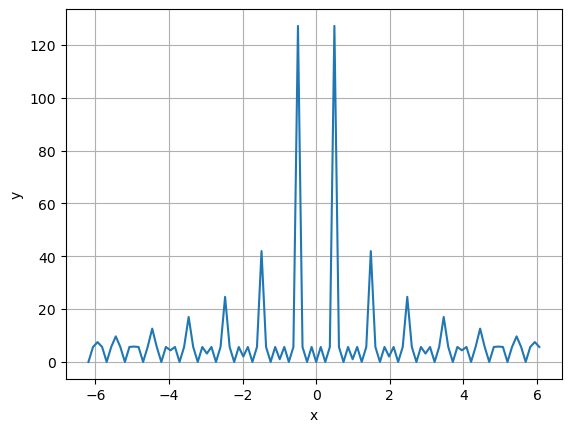

In [162]:
plt.plot(x2,yg) #спектр прямоугольного сигнала
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [163]:
noise = np.random.normal(0,1,x2.shape) # значения белого шума
print(noise)

[ 4.09034461e-01  8.41929327e-01  5.76735238e-01 -2.98265755e-01
 -1.67539579e-01 -3.52290954e-01 -7.54482499e-01  7.60023109e-02
 -5.23835187e-01  4.73387488e-01  1.08144303e+00  1.36473830e+00
 -6.51718937e-01  3.49755195e-01 -1.00620066e+00  1.27285795e+00
 -1.01331604e+00  9.15239482e-01  1.01602372e+00  5.85554590e-01
 -3.76452978e-01  7.01610317e-01 -1.09425378e+00 -9.06860514e-01
  9.05874955e-01  2.30016483e-01 -2.58418660e-02  1.18024601e+00
  9.42345197e-01 -8.84336610e-01 -1.96307537e+00 -3.40297090e-01
 -8.56509622e-01  8.84248869e-01  1.46748325e+00  2.23835258e-01
 -1.77526523e-01 -4.54637905e-02  1.47476837e+00 -6.04351132e-01
 -1.62500324e+00 -1.85469466e+00  5.12773817e-01  9.39246976e-01
 -1.41409308e+00  2.65889004e-01  1.11592659e+00 -5.04575726e-01
 -3.08411140e-01 -1.08486799e-01 -8.30730368e-01 -8.85954758e-01
  1.23166345e-01 -4.11982461e-02  1.73647168e-01 -8.31014824e-01
  1.00969509e+00 -1.15311953e+00  5.21547298e-01 -1.13534918e+00
 -7.45007520e-01 -8.98080

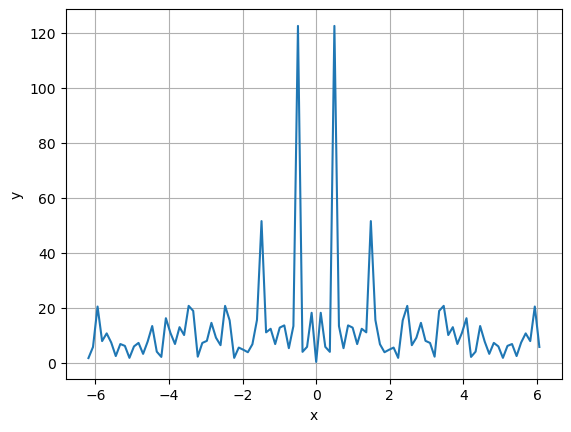

In [167]:
xn =  np.linspace(-4,4,100)
yn = [f(t) for t in xn]
xn = np.fft.fftshift(np.fft.fftfreq(xn.shape[-1], xn[1]-xn[0]))


plt.plot(xn,abs(np.fft.fftshift(fft(yn+noise)))) #спектр прямоугольного сигнала с шумами

#+noise

plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()